# Pymaceuticals Inc.

Analysis:

 
 




By analyzing the data given, Capomulin and Ramicane are very close in results. Ramicane would be one to observe and analyze a little closer. Ramicane's standard deviation and standard error is a tad less with 4.84 std and 0.320 standard error compared to Capomulin's 4.99 standard deviation and 0.329 standard error. 

In addition, the data shows that the longer the Capomulin drug was given, the smaller the volume of the tumor. The smallest timepoint was around day 35 then after that is started to increase in size again. 

Finally, the correlation coefficient for Capomulin for mouse weight and average tumor volume is .84. This shows there is a very high correlation between weight and tumor volume. For example, the higher the weight; the higher the tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(study_results,mouse_metadata, how="left",  on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Checking the number of mice
mice_count = len(mouse_study_results["Mouse ID"].unique())
mice_count                         

249

In [3]:
mouse_study_duplicates = mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint'])
mouse_study_duplicates 

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
#identify the duplicate mouse for Mouse ID and Timepoint
mouse_study_duplicates = mouse_study_results.loc[mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
mouse_study_duplicates

array(['g989'], dtype=object)

In [5]:
#drop the duplicate mouse by its ID.
mouse_study_results = mouse_study_results.loc[mouse_study_results['Mouse ID'] != "g989"]

mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
#Number of mice dropping duplicate
mice_count = len(mouse_study_results["Mouse ID"].unique())
mice_count 

248

In [7]:
#number of drug regimen
num_of_regimen = mouse_study_results["Drug Regimen"].value_counts()
num_of_regimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [8]:
# mean of tumor volume
sum_tumor_volume = mouse_study_results.groupby(["Drug Regimen"]).sum()["Tumor Volume (mm3)"]
sum_tumor_volume


Drug Regimen
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Ketapril     10384.299876
Naftisol     10105.671026
Placebo       9780.078122
Propriva      7743.497619
Ramicane      9169.417875
Stelasyn      9816.199991
Zoniferol     9689.044192
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#Groupby to calculate mean
mean_tumor_volume = mouse_study_results.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#Groupby to calculate median
median_tumor_volume = mouse_study_results.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#Groupby to calculate variance
variance_tumor_volume = mouse_study_results.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance_tumor_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Groupby to calculate standard deviation
std_tumor_volume = mouse_study_results.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Groupby to calculate standard error
sem_tumor_volume = mouse_study_results.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Set drug regimen as index
by_drug_regimen = mouse_study_results.set_index("Drug Regimen")
by_drug_regimen



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ketapril,f932,0,45.000000,0,Male,15,29
Ketapril,g107,0,45.000000,0,Female,2,29
Ketapril,a457,0,45.000000,0,Female,11,30
Ketapril,c819,0,45.000000,0,Male,21,25
...,...,...,...,...,...,...,...
Capomulin,r944,45,41.581521,2,Male,12,25
Capomulin,u364,45,31.023923,3,Male,18,17
Ceftamin,p438,45,61.433892,1,Female,11,26


In [15]:
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_by_regimen = pd.DataFrame(
    {"Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume})

tumor_volume_by_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_volume_agg_ = mouse_study_results.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
tumor_volume_agg_

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

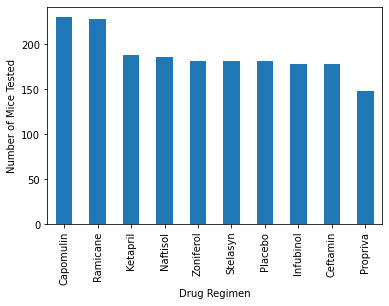

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_regimen = mouse_study_results["Drug Regimen"].value_counts()
count_regimen.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


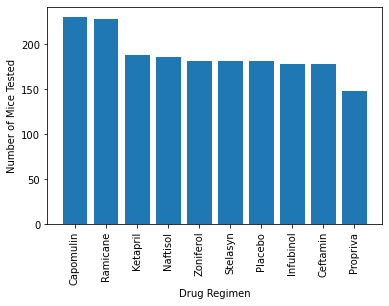

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count_regimen = mouse_study_results["Drug Regimen"].value_counts()
plt.bar(count_regimen.index, count_regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

In [19]:
count_regimen.index



Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

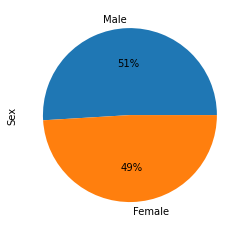

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_sex = mouse_study_results["Sex"].value_counts()
count_sex.plot(kind="pie", autopct="%1.0f%%")

plt.show()


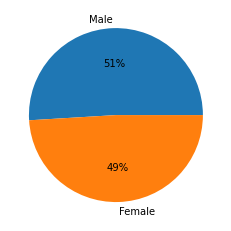

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_sex= mouse_study_results["Sex"].value_counts()
labels = ["Male", "Female"]

plt.pie(count_sex, labels=labels, autopct="%1.0f%%")
#plt.title("Sex")
plt.show()

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


final_tumor_volume = mouse_study_results.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

final_tumor_volume

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [23]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_tumor_volume = final_tumor_volume.merge(mouse_study_results, on=["Mouse ID", "Timepoint"], how="left")
mouse_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    final_tumor_volumes = mouse_tumor_volume.loc[mouse_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
     
    # add subset 
    tumor_volume_list.append(final_tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    possible_outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    print(f" {treatment}'s potential outliers: {possible_outliers}")

 Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


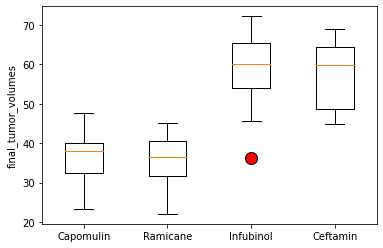

In [25]:
 # Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
flierprops = dict(markerfacecolor='red', markersize=12)
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ax1.set_ylabel("final_tumor_volumes")


plt.boxplot(tumor_volume_list, flierprops=flierprops, labels=labels )
plt.show()



In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Capomulin"]
x_axis
xmouse = x_axis.loc[x_axis["Mouse ID"] == "l509"]


In [27]:
y = xmouse["Tumor Volume (mm3)"]
y

231     45.000000
253     45.851193
539     46.759074
881     47.488599
982     48.070452
1146    44.006257
1414    44.708055
1499    40.207288
1723    40.770813
1771    41.483008
Name: Tumor Volume (mm3), dtype: float64

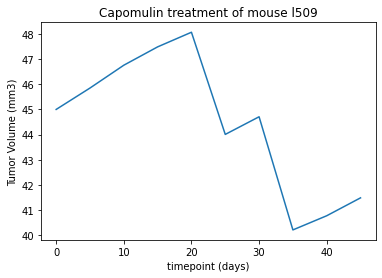

In [28]:
plt.plot(xmouse["Timepoint"], y)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("timepoint (days)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

In [29]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# select info for only ["Capomulin"]
capo = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Capomulin"]

#get average tumor volume
average_tumor_volume = capo.groupby(["Mouse ID", "Weight (g)"]).mean()["Tumor Volume (mm3)"]



 

In [30]:
#ylabel data
average_tumor_volume

Mouse ID  Weight (g)
b128      22            41.963636
b742      21            40.083699
f966      17            36.505973
g288      19            41.990097
g316      22            44.613344
i557      24            44.805810
i738      20            39.141053
j119      23            44.465236
j246      21            43.216925
l509      21            44.434474
l897      19            42.507261
m601      17            34.847470
m957      19            39.049816
r157      25            45.798970
r554      17            36.509212
r944      25            43.367364
s185      17            34.559143
s710      23            42.803733
t565      17            39.328725
u364      17            39.887495
v923      21            41.581595
w150      23            41.384825
w914      21            41.352452
x401      15            36.182040
y793      17            38.506829
Name: Tumor Volume (mm3), dtype: float64

In [31]:
#xlabel data
weight = capo.groupby(["Mouse ID"]).mean()["Weight (g)"]
weight

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

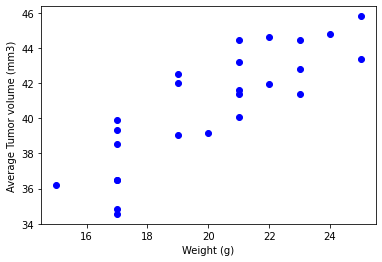

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weight, average_tumor_volume, marker="o", facecolors="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.show()

# Correlation and Regression

In [33]:
#import dependency
from scipy.stats import linregress


Correlation = 0.8419363424694719


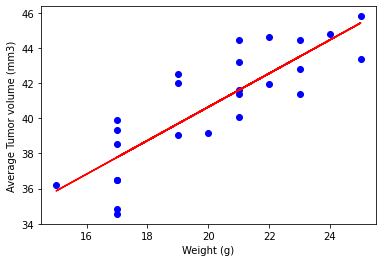

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation,p = st.pearsonr(weight, average_tumor_volume)
print('Correlation = {}'.format(correlation))
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)
regress_value = weight * slope + intercept
plt.scatter(weight, average_tumor_volume, marker="o", facecolors="blue")
plt.plot(weight, regress_value, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.show()
